In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

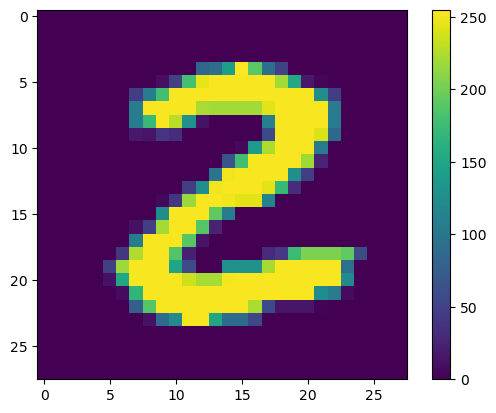

In [3]:
plt.figure()
plt.imshow(train_images[25])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [5]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 59210 (231.29 KB)
Trainable params: 59210 (231.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 1s 573us/step - loss: 0.3549 - accuracy: 0.8899
Epoch 2/10
1875/1875 [==============================] - 1s 562us/step - loss: 0.1782 - accuracy: 0.9452
Epoch 3/10
1875/1875 [==============================] - 1s 558us/step - loss: 0.1431 - accuracy: 0.9554
Epoch 4/10
1875/1875 [==============================] - 1s 552us/step - loss: 0.1212 - accuracy: 0.9620
Epoch 5/10
1875/1875 [==============================] - 1s 554us/step - loss: 0.1040 - accuracy: 0.9679
Epoch 6/10
1875/1875 [==============================] - 1s 556us/step - loss: 0.0927 - accuracy: 0.9705
Epoch 7/10
1875/1875 [==============================] - 1s 549us/step - loss: 0.0830 - accuracy: 0.9731
Epoch 8/10
1875/1875 [==============================] - 1s 546us/step - loss: 0.0770 - accuracy: 0.9747
Epoch 9/10
1875/1875 [==============================] - 1s 548us/step - loss: 0.0727 - accuracy: 0.9767
Epoch 10/10
1875/1875 [==============================] - 1s 548u

In [8]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 351us/step - loss: 0.1309 - accuracy: 0.9620


[0.13086603581905365, 0.9620000123977661]

In [9]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 32ms/step
[7 2 1 0 4]


In [10]:
# Check our predictions against the ground truths.
print(test_labels[:5])

[7 2 1 0 4]


In [11]:
model_ex = Sequential([
  model,
  Dense(10, activation='softmax'),
])

In [12]:
model.trainable = False

# Compile the model.
model_ex.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [13]:
# Train the model.
model_ex.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 1s 353us/step - loss: 1.2711 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 1s 358us/step - loss: 0.3250 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 1s 350us/step - loss: 0.1533 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 1s 344us/step - loss: 0.1121 - accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 1s 344us/step - loss: 0.0992 - accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 1s 350us/step - loss: 0.0946 - accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 1s 351us/step - loss: 0.0925 - accuracy: 0.9780
Epoch 8/10
1875/1875 [==============================] - 1s 349us/step - loss: 0.0914 - accuracy: 0.9781
Epoch 9/10
1875/1875 [==============================] - 1s 356us/step - loss: 0.0908 - accuracy: 0.9782
Epoch 10/10
1875/1875 [==============================] - 1s 353u

In [14]:
model_ex.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 366us/step - loss: 0.1599 - accuracy: 0.9661


[0.15985499322414398, 0.9660999774932861]

In [15]:
model_ex.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                59210     
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 59320 (231.72 KB)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 59210 (231.29 KB)
_________________________________________________________________


---

In [16]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

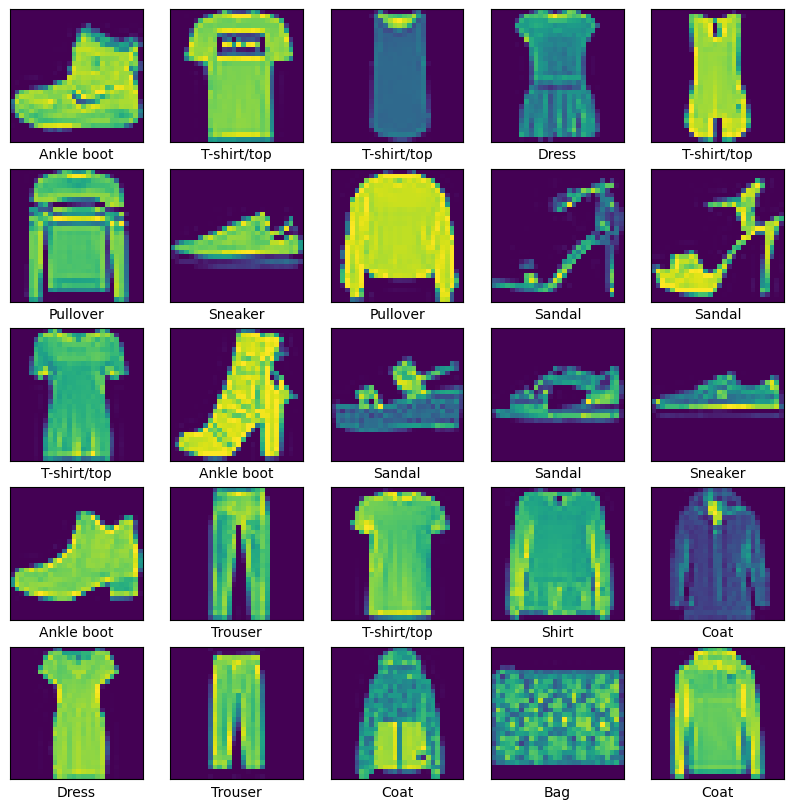

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [20]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
)

Epoch 1/10
1875/1875 [==============================] - 1s 718us/step - loss: 1.3537 - accuracy: 0.7459
Epoch 2/10
1875/1875 [==============================] - 1s 708us/step - loss: 0.5431 - accuracy: 0.8116
Epoch 3/10
1875/1875 [==============================] - 1s 712us/step - loss: 0.4619 - accuracy: 0.8378
Epoch 4/10
1875/1875 [==============================] - 1s 711us/step - loss: 0.4252 - accuracy: 0.8469
Epoch 5/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.4061 - accuracy: 0.8530
Epoch 6/10
1875/1875 [==============================] - 1s 722us/step - loss: 0.3849 - accuracy: 0.8626
Epoch 7/10
1875/1875 [==============================] - 1s 714us/step - loss: 0.3759 - accuracy: 0.8643
Epoch 8/10
1875/1875 [==============================] - 1s 718us/step - loss: 0.3651 - accuracy: 0.8678
Epoch 9/10
1875/1875 [==============================] - 1s 711us/step - loss: 0.3579 - accuracy: 0.8701
Epoch 10/10
1875/1875 [==============================] - 1s 710u

In [22]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 403us/step - loss: 0.4621 - accuracy: 0.8436


[0.46211883425712585, 0.8435999751091003]

In [23]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 364us/step


In [24]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

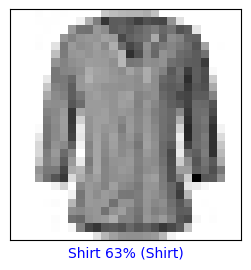

In [25]:
i = 4
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], test_labels, test_images)